In [1]:
import re
from pathlib import Path

import geopandas as gp
import pandas as pd

import folium

In [2]:
# Setting up directories

WORKINGDIR = Path(os.getcwd())
DATADIR = Path("data", "geolocation")
PROJECTROOT = WORKINGDIR.parents[1]

SHAPEFILE = Path("ph_cities_boundaries", "ph_cities.shp")
COORDSFILE = Path("ph_cities_coordinates", "cities_municipalities_with_coordinates.csv")

# Helper Functions

In [3]:
def data_cleaner(text):
    # Make lower caps
    text = text.lower()

    # Remove "city"
    text = text.replace("city", "")

    # Remove " of "
    text = text.replace(" of ", "")

    # Remove punctuation marks
    text = re.sub(r"[^\w\s]", "", text)

    # Remove spaces
    text = text.replace(" ", "")

    # Replace compostela valley with Davao de Oro
    text = text.replace("compostelavalley", "davaodeoro")

    # Replace Maguindanao with del Norte/del Sur
    if "maguindanao" in text:
        text = "maguindanao"

    # Replace North Cotabato with Cotabato
    text = text.replace("northcotabato", "cotabato")

    # Replace santo with sto
    text = text.replace("santo", "sto")

    # Replace santa with sta
    text = text.replace("santa", "sta")

    return text

# Dataframe for shape/boundaries

In [4]:
gdf = gp.read_file(Path(PROJECTROOT, DATADIR, SHAPEFILE))
gdf.head()

,NAME_1,NAME_2,ENGTYPE_2,geometry
0,Abra,Bangued,Municipality,"POLYGON ((120.61134 17.49558, 120.60941 17.496..."
1,Abra,Boliney,Municipality,"POLYGON ((120.81400 17.34210, 120.76862 17.340..."
2,Abra,Bucay,Municipality,"POLYGON ((120.67766 17.45736, 120.67324 17.469..."
3,Abra,Bucloc,Municipality,"POLYGON ((120.78922 17.44525, 120.80331 17.449..."
4,Abra,Daguioman,Municipality,"POLYGON ((120.90749 17.41933, 120.89281 17.446..."


<AxesSubplot: >

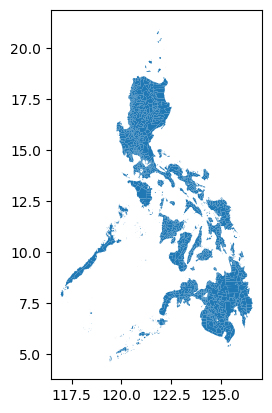

In [5]:
gdf.plot(legend=True)

# Dataframe for longitude/latitude

In [6]:
df = pd.read_csv(Path(PROJECTROOT, DATADIR, COORDSFILE))

# Remove unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
df.head()

,psgc,province,city_municipality,concat,corr_code,geog_level,old_names,city_cls,income_cls,urban_rural,2015_pop,2015_pop_tag,2020_pop,2020_pop_tag,status,search_term,longitude,latitude
0,102801000,Ilocos Norte,Adams,Ilocos Norte|Adams,12801000.0,Mun,NaN,NaN,5th,NaN,"1,792",NaN,"2,189",NaN,NaN,"Adams, Ilocos Norte",120.903571,18.461311
1,102802000,Ilocos Norte,Bacarra,Ilocos Norte|Bacarra,12802000.0,Mun,NaN,NaN,3rd,NaN,"32,215",NaN,"33,496",NaN,NaN,"Bacarra, Ilocos Norte",120.610659,18.251738
2,102803000,Ilocos Norte,Badoc,Ilocos Norte|Badoc,12803000.0,Mun,NaN,NaN,3rd,NaN,"31,616",NaN,"32,530",NaN,NaN,"Badoc, Ilocos Norte",120.474089,17.926701
3,102804000,Ilocos Norte,Bangui,Ilocos Norte|Bangui,12804000.0,Mun,NaN,NaN,4th,NaN,"14,672",NaN,"15,019",NaN,NaN,"Bangui, Ilocos Norte",120.765756,18.536739
4,102805000,Ilocos Norte,City of Batac,Ilocos Norte|City of Batac,12805000.0,City,NaN,CC,5th,NaN,"55,201",NaN,"55,484",NaN,NaN,"City of Batac, Ilocos Norte",120.581750,18.037300


In [8]:
df["clean_province"] = df["province"].apply(data_cleaner)
gdf["clean_province"] = gdf["NAME_1"].apply(data_cleaner)

df["clean_city"] = df["city_municipality"].apply(data_cleaner)
gdf["clean_city"] = gdf["NAME_2"].apply(data_cleaner)

In [9]:
df["clean_index"] = (
    df["clean_city"].astype(str) + ", " + df["clean_province"].astype(str)
)
gdf["clean_index"] = (
    gdf["clean_city"].astype(str) + ", " + gdf["clean_province"].astype(str)
)

In [10]:
df = df.merge(gdf, how="left", on="clean_index")

In [11]:
df.loc[df["geometry"].isnull()]

,psgc,province,city_municipality,concat,corr_code,geog_level,old_names,city_cls,income_cls,urban_rural,...,latitude,clean_province_x,clean_city_x,clean_index,NAME_1,NAME_2,ENGTYPE_2,geometry,clean_province_y,clean_city_y
106,105530000,Pangasinan,Pozorrubio,Pangasinan|Pozorrubio,15530000.0,Mun,NaN,NaN,1st,NaN,...,16.110281,pangasinan,pozorrubio,"pozorrubio, pangasinan",NaN,NaN,NaN,None,NaN,NaN
270,304917000,Nueva Ecija,Science City of Muñoz,Nueva Ecija|Science City of Muñoz,34917000.0,City,NaN,CC,4th,NaN,...,15.713541,nuevaecija,sciencemuñoz,"sciencemuñoz, nuevaecija",NaN,NaN,NaN,None,NaN,NaN
404,402123000,Cavite,Gen. Mariano Alvarez,Cavite|Gen. Mariano Alvarez,42123000.0,Mun,NaN,NaN,1st,NaN,...,14.295648,cavite,genmarianoalvarez,"genmarianoalvarez, cavite",NaN,NaN,NaN,None,NaN,NaN
542,1705321000,Palawan,Kalayaan,Palawan|Kalayaan,175321000.0,Mun,NaN,NaN,5th,NaN,...,9.742915,palawan,kalayaan,"kalayaan, palawan",NaN,NaN,NaN,None,NaN,NaN
545,1705324000,Palawan,Sofronio Española,Palawan|Sofronio Española,175324000.0,Mun,NaN,NaN,2nd,NaN,...,8.958755,palawan,sofronioespañola,"sofronioespañola, palawan",NaN,NaN,NaN,None,NaN,NaN
623,501731000,Camarines Sur,Sagñay,Camarines Sur|Sagñay,51731000.0,Mun,NaN,NaN,4th,NaN,...,13.603393,camarinessur,sagñay,"sagñay, camarinessur",NaN,NaN,NaN,None,NaN,NaN
744,603017000,Iloilo,Dueñas,Iloilo|Dueñas,63017000.0,Mun,NaN,NaN,4th,NaN,...,11.066244,iloilo,dueñas,"dueñas, iloilo",NaN,NaN,NaN,None,NaN,NaN
810,701201000,Bohol,Alburquerque,Bohol|Alburquerque,71201000.0,Mun,NaN,NaN,5th,NaN,...,9.610419,bohol,alburquerque,"alburquerque, bohol",NaN,NaN,NaN,None,NaN,NaN
835,701226000,Bohol,Getafe,Bohol|Getafe,71226000.0,Mun,NaN,NaN,3rd,NaN,...,10.149711,bohol,getafe,"getafe, bohol",NaN,NaN,NaN,None,NaN,NaN
844,701235000,Bohol,President Carlos P. Garcia,Bohol|President Carlos P. Garcia,71235000.0,Mun,Pitogo,NaN,4th,NaN,...,10.120566,bohol,presidentcarlospgarcia,"presidentcarlospgarcia, bohol",NaN,NaN,NaN,None,NaN,NaN


In [12]:
# This is a df that contains matches that I had to do manually
df_nulls = pd.read_csv("conflict_index.csv")
df_nulls

,df_index,name,gdf_index
0,810,Alburquerque,206.0
1,1562,Amai Manabilang,808.0
2,1354,City of Caloocan,945.0
3,1216,City of Ozamiz,972.0
4,877,Cordova,453.0
5,1612,Datu Abdullah Sangki,889.0
6,1614,Datu Hoffer Ampatuan,NaN
7,1617,Datu Salibo,NaN
8,1294,Don Marcelino,512.0
9,744,Dueñas,654.0


In [13]:
gdf_cols = [
    "NAME_1",
    "NAME_2",
    "ENGTYPE_2",
    "geometry",
]

In [14]:
non_nulls = df_nulls.loc[~df_nulls["gdf_index"].isnull()]
non_nulls

,df_index,name,gdf_index
0,810,Alburquerque,206.0
1,1562,Amai Manabilang,808.0
2,1354,City of Caloocan,945.0
3,1216,City of Ozamiz,972.0
4,877,Cordova,453.0
5,1612,Datu Abdullah Sangki,889.0
8,1294,Don Marcelino,512.0
9,744,Dueñas,654.0
10,404,Gen. Mariano Alvarez,418.0
11,835,Getafe,232.0


In [15]:
non_nulls["df_index"]

0      810
1     1562
2     1354
3     1216
4      877
5     1612
8     1294
9      744
10     404
11     835
14    1295
16    1296
18     894
19    1093
20     106
21     844
22     623
23    1297
24    1327
25    1049
26    1298
27     270
28    1098
30     545
Name: df_index, dtype: int64

In [16]:
for df_index in non_nulls["df_index"]:
    gdf_index = int(
        non_nulls["gdf_index"].loc[non_nulls["df_index"] == df_index].values[0]
    )

    for col in gdf_cols:
        df[col].iat[df_index] = gdf[col].iat[gdf_index]

In [17]:
df.loc[df["geometry"].isnull()]

,psgc,province,city_municipality,concat,corr_code,geog_level,old_names,city_cls,income_cls,urban_rural,...,latitude,clean_province_x,clean_city_x,clean_index,NAME_1,NAME_2,ENGTYPE_2,geometry,clean_province_y,clean_city_y
542,1705321000,Palawan,Kalayaan,Palawan|Kalayaan,175321000.0,Mun,NaN,NaN,5th,NaN,...,9.742915,palawan,kalayaan,"kalayaan, palawan",NaN,NaN,NaN,None,NaN,NaN
1255,1102317000,Davao del Norte,Island Garden City of Samal,Davao del Norte|Island Garden City of Samal,112317000.0,City,NaN,CC,4th,NaN,...,7.078026,davaodelnorte,islandgardensamal,"islandgardensamal, davaodelnorte",NaN,NaN,NaN,None,NaN,NaN
1525,1900712000,Basilan,Hadji Muhtamad,Basilan|Hadji Muhtamad,150712000.0,Mun,NaN,NaN,-,NaN,...,6.659597,basilan,hadjimuhtamad,"hadjimuhtamad, basilan",NaN,NaN,NaN,None,NaN,NaN
1526,1900713000,Basilan,Tabuan-Lasa,Basilan|Tabuan-Lasa,150713000.0,Mun,NaN,NaN,-,NaN,...,6.316046,basilan,tabuanlasa,"tabuanlasa, basilan",NaN,NaN,NaN,None,NaN,NaN
1585,1906619000,Sulu,Omar,Sulu|Omar,156619000.0,Mun,NaN,NaN,-,NaN,...,6.009757,sulu,omar,"omar, sulu",NaN,NaN,NaN,None,NaN,NaN
1614,1908805000,Maguindanao del Sur,Datu Hoffer Ampatuan,Maguindanao del Sur|Datu Hoffer Ampatuan,153835000.0,Mun,NaN,NaN,-,NaN,...,6.858064,maguindanao,datuhofferampatuan,"datuhofferampatuan, maguindanao",NaN,NaN,NaN,None,NaN,NaN
1617,1908808000,Maguindanao del Sur,Datu Salibo,Maguindanao del Sur|Datu Salibo,153836000.0,Mun,NaN,NaN,-,NaN,...,6.976731,maguindanao,datusalibo,"datusalibo, maguindanao",NaN,NaN,NaN,None,NaN,NaN
1630,1908821000,Maguindanao del Sur,Shariff Saydona Mustapha,Maguindanao del Sur|Shariff Saydona Mustapha,153837000.0,Mun,NaN,NaN,-,NaN,...,6.881631,maguindanao,shariffsaydonamustapha,"shariffsaydonamustapha, maguindanao",NaN,NaN,NaN,None,NaN,NaN


In [18]:
gdf_ = gp.GeoDataFrame(df)

In [19]:
keep_cols = [
    "psgc",
    "province",
    "city_municipality",
    "geometry",
    "longitude",
    "latitude",
    "clean_province_x",
    "clean_city_x",
    "clean_index",
]

In [20]:
gdf_ = gdf_[keep_cols]
gdf_["coords"] = gdf_["latitude"].astype(str) + ", " + gdf_["longitude"].astype(str)

In [21]:
OUTPUTFILE = Path("ph_cities_joined", "ph_cities.shp")

In [22]:
rename_dict = {
    "city_municipality": "city_mun",
    "clean_province_x": "clean_prov",
    "clean_city_x": "clean_city",
    "clean_index": "clean_idx",
}

In [23]:
gdf.rename(columns=rename_dict, inplace=True)

In [24]:
gdf_.to_file(Path(PROJECTROOT, DATADIR, OUTPUTFILE), index=False)

/var/folders/d8/ppdd00vj50s7x6lk402s3p9h0000gn/T/ipykernel_10850/371977953.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_.to_file(Path(PROJECTROOT, DATADIR, OUTPUTFILE), index=False)


In [25]:
gdf_ = gp.read_file(Path(PROJECTROOT, DATADIR, OUTPUTFILE))

In [26]:
gdf_.head()

,psgc,province,city_munic,longitude,latitude,clean_prov,clean_city,clean_inde,coords,geometry
0,102801000,Ilocos Norte,Adams,120.903571,18.461311,ilocosnorte,adams,"adams, ilocosnorte","18.4613108, 120.903571","POLYGON ((120.96105 18.44746, 120.96137 18.446..."
1,102802000,Ilocos Norte,Bacarra,120.610659,18.251738,ilocosnorte,bacarra,"bacarra, ilocosnorte","18.2517377, 120.6106589","POLYGON ((120.64023 18.25566, 120.63957 18.254..."
2,102803000,Ilocos Norte,Badoc,120.474089,17.926701,ilocosnorte,badoc,"badoc, ilocosnorte","17.9267006, 120.4740893","MULTIPOLYGON (((120.54331 17.91912, 120.54858 ..."
3,102804000,Ilocos Norte,Bangui,120.765756,18.536739,ilocosnorte,bangui,"bangui, ilocosnorte","18.5367387, 120.7657563","POLYGON ((120.79987 18.51717, 120.79823 18.514..."
4,102805000,Ilocos Norte,City of Batac,120.581750,18.037300,ilocosnorte,batac,"batac, ilocosnorte","18.0373, 120.58175","POLYGON ((120.62589 18.06064, 120.62514 18.058..."


# Mapping

In [36]:
ph = folium.Map(location=[12.8797,121.7740], tiles="OpenStreetMap", zoom_start=5)
ph

In [37]:
# add marker one by one on the map
for i in range(0,len(gdf_)):
   folium.Marker(
      location=[gdf_.iloc[i]['latitude'], gdf_.iloc[i]['longitude']],
      popup=gdf_.iloc[i]['city_munic'],
   ).add_to(ph)



# Show the map again
ph